___
# <font color=#EEAA11> HW #5: Visualization, IDA and EDA </font>

____

![missing](https://jenslaufer.com/figure/source/2019-02-05-visualize_missing_values_with_ggplot/unnamed-chunk-13-1.png)

## <font color=#00BBFF> Problem #1 IDA (10 pts) </font>

In this problem you are going to explore IDA: Initial Data Analysis, which is can be defined many ways, but we will assume it contains these steps:
* Data collection and importation
* Data cleaning and preprocessing
* Variable identification and classification
* Basic descriptive statistics
* Data quality assessment
* Missing data analysis
* Outlier detection

🤓 Follow these steps:
* import the planets dataset, which is in Seaborn
    - in this case, the data has been collected for us and you simply need to import it into a Pandas dataframe
* based on your initial assessment of this dataset, how should it be cleaned and processed? discuss your observations in a markdown cell and write the code to complete this task
* what types of variables are there? ordinal? categorical? cardinal? add this to your discussion in the markdown cell
* find the statistics of the different features of the data; what simple methods are in Pandas are there for this? are there variables for which this doesn't make sense? do any of them need to be encoded? 
* based on what you see so far, what is the quality of this data? basic IDA for this might include using `.describe` and `.info` 
* did you note any missing data? make a heat map of this dataset that shows missing values (I have given an example code for this in the past, but feel free to write your own); 
* for each feature/column for which it makes sense, scale the column using the z-score and print the number of outliers for that column (that is, how many rows in the column have values $<-3$ or $>3$ after scaling?)



These IDA steps have already revealed important properties of this dataset. You will want to follow these steps for your project and document what you found. A nice feature of a web app is to have a tab, perhaps called "Dataset(s)", that describes the dataset(s) used for the app. 
____

Next, let's examine EDA, which follows the IDA steps. Let's summarize IDA in a table and compare to EDA:

| Phase | Step | Key Activities |
|-------|------|----------------|
| IDA | 1. Data collection and importation | - Gather data from various sources<br>- Import data into analysis environment (e.g., Python, R) |
| IDA | 2. Data cleaning and preprocessing | - Handle missing values<br>- Remove duplicates<br>- Correct data types<br>- Standardize formats |
| IDA | 3. Variable identification and classification | - Identify dependent and independent variables<br>- Classify variables (numeric, categorical, etc.)<br>- Understand the meaning of each variable |
| IDA | 4. Basic descriptive statistics | - Calculate mean, median, mode<br>- Determine range, variance, standard deviation<br>- Identify minimum and maximum values |
| IDA | 5. Data quality assessment | - Check for inconsistencies<br>- Verify data accuracy<br>- Assess data completeness |
| IDA | 6. Missing data analysis | - Quantify missing data<br>- Identify patterns in missing data<br>- Decide on imputation strategy if necessary |
| IDA | 7. Outlier detection | - Identify potential outliers<br>- Assess impact of outliers<br>- Decide on treatment of outliers |
| EDA | 1. Univariate analysis | - Create histograms, box plots for numeric variables<br>- Generate bar charts for categorical variables<br>- Calculate summary statistics |
| EDA | 2. Bivariate analysis | - Create scatter plots<br>- Perform cross-tabulations<br>- Calculate correlations between pairs of variables |
| EDA | 3. Multivariate analysis | - Use dimensionality reduction techniques (e.g., PCA)<br>- Create pair plots or correlation matrices<br>- Explore interactions between multiple variables |
| EDA | 4. Correlation analysis | - Calculate correlation coefficients<br>- Create correlation heatmaps<br>- Identify strongly correlated variables |
| EDA | 5. Dimensionality assessment | - Evaluate number of features vs. observations<br>- Consider feature selection or extraction methods<br>- Assess impact of high dimensionality on analysis |
| EDA | 6. Pattern and trend identification | - Look for temporal trends in time series data<br>- Identify seasonal patterns<br>- Detect clusters or groupings in the data |
| EDA | 7. Hypothesis generation | - Formulate potential relationships between variables<br>- Develop questions for further investigation<br>- Identify areas for more detailed statistical analysis |

Note: The boundary between IDA and EDA can be fluid, and some activities may overlap or be performed iteratively throughout the analysis process.

### importing data

In [75]:
import seaborn as sns
planets= sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [36]:
planets.number.unique()

array([1, 2, 3, 5, 4, 6, 7])

The Planets dataset includes information about exoplanets, such as their orbital periods and masses. It includes features such as method of detecting the exoplanet, number of planets in the system, orbital period, mass of the planet, and distance from Earth.


In [24]:
planets.describe()
#mean, std, min, max before scaling

,number,orbital_period,mass,distance,year
count,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02
mean,-1.141434e-16,-2.853585e-17,1.783491e-18,-8.560756e-17,1.339045e-14
std,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00
min,-6.257261e-01,-5.685613e-01,-6.897828e-01,-1.089561e+00,-4.414384e+00
25%,-6.257261e-01,-5.433891e-01,-6.322762e-01,-5.922914e-01,-5.710916e-01
50%,-6.257261e-01,-3.262207e-01,-3.480462e-01,-2.605459e-01,3.897314e-01
75%,2.256717e-01,1.116213e-01,9.860095e-02,1.560560e-01,8.701429e-01
max,3.631263e+00,1.124362e+01,6.191308e+00,6.486289e+00,1.590760e+00


## finding null values

<Axes: >

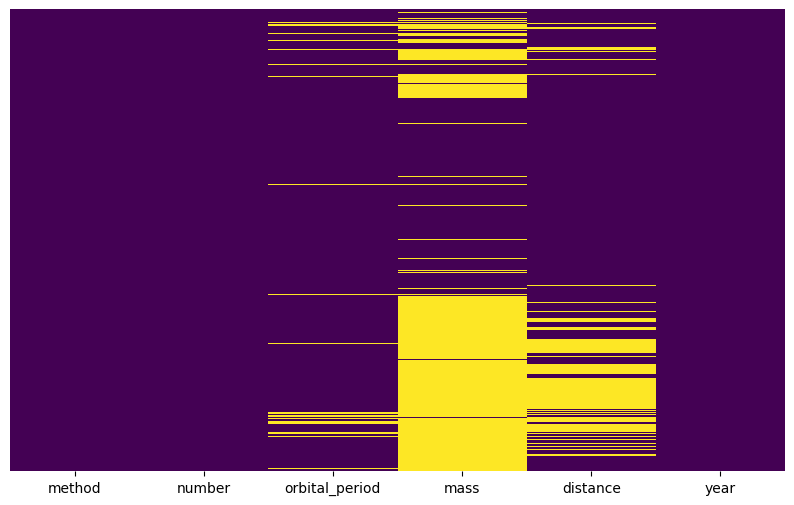

In [138]:
import matplotlib.pyplot as plt
missing_values = planets.isnull()

# Plot the heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False, yticklabels=False)

In [5]:
import seaborn as sns
planets_unaltered= sns.load_dataset('planets')
planets.head()
print(planets_unaltered[planets_unaltered.isna()==True]['distance'].unique())
print(planets_unaltered[planets_unaltered.isna()==True]['method'].unique())
print(planets_unaltered[planets_unaltered.isna()==True]['number'].unique())
print(planets_unaltered[planets_unaltered.isna()==True]['year'].unique())
print(planets_unaltered[planets_unaltered.isna()==True]['mass'].unique())
print(planets_unaltered[planets_unaltered.isna()==True]['orbital_period'].unique())

[nan]
[nan]
[nan]
[nan]
[nan]
[nan]


There are no patterns observed in the missing values, hence, all the rows having missing data will be removed. 

## Data cleaning

In [7]:
print(planets.isnull().value_counts())
planets=planets.dropna()
print(planets.isnull().value_counts())

# remove the rows containing null values. This step is essential becai
# remove outliers
# remove duplicates and redunddant data
planets= planets.drop_duplicates()


method  number  orbital_period  mass   distance  year 
False   False   False           False  False     False    498
                                True   False     False    278
                                       True      False    201
                True            True   False     False     32
                False           False  True      False     15
                True            True   True      False     11
Name: count, dtype: int64
method  number  orbital_period  mass   distance  year 
False   False   False           False  False     False    498
Name: count, dtype: int64


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization (exclude non-numerical data like 'method')
numerical_cols = planets.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
planets[numerical_cols] = scaler.fit_transform(planets[numerical_cols])

a = scaler.fit(planets[numerical_cols])
type(a)

sklearn.preprocessing._data.StandardScaler

In [11]:
planets.describe()

,number,orbital_period,mass,distance,year
count,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02,4.980000e+02
mean,-1.141434e-16,-2.853585e-17,1.783491e-18,-8.560756e-17,1.339045e-14
std,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00,1.001006e+00
min,-6.257261e-01,-5.685613e-01,-6.897828e-01,-1.089561e+00,-4.414384e+00
25%,-6.257261e-01,-5.433891e-01,-6.322762e-01,-5.922914e-01,-5.710916e-01
50%,-6.257261e-01,-3.262207e-01,-3.480462e-01,-2.605459e-01,3.897314e-01
75%,2.256717e-01,1.116213e-01,9.860095e-02,1.560560e-01,8.701429e-01
max,3.631263e+00,1.124362e+01,6.191308e+00,6.486289e+00,1.590760e+00


## removing outliers

In [13]:
# planets.select_dtypes(include=['float64']).columns
# planets = planets[planets[planets.select_dtypes(include=['float64']).columns].between(-3, 3)]
# float_cols = planets.select_dtypes(include=['float64']).columns
# planets = planets[(planets[float_cols] >= -3) & (planets[float_cols] <= 3)].dropna()
float_cols = planets.select_dtypes(include=['float64']).columns
planets = planets[planets[float_cols].apply(lambda x: x.between(-3, 3)).any(axis=1)].dropna()


In [15]:
planets.count()

method            498
number            498
orbital_period    498
mass              498
distance          498
year              498
dtype: int64

### Variable identification

* `method`: Method of detecting the exoplanet 
  * Type: categorical
* `number`: Number of planets in the system
  * Type: cardinal
* `orbital_period`: Orbital period in Earth days
  * Type: numerical
* `mass`: Mass of the planet in Jupiter masses
  * Type: numerical
* `distance`: Distance from Earth in light-years
  * Type: numerical
* `year`: The year identifified
  * Type: categorical
 
All the variables are independent variables. 

In [429]:
planets.describe()
#mean, standard deviation, quartile ranges, min values, max values after scaling

,number,orbital_period,mass,distance,year
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,1.860892,666.511718,1.004843,45.484462,2007.690289
std,1.264523,1212.872380,1.451644,35.654685,3.996529
min,1.000000,1.328300,0.003600,1.350000,1995.000000
25%,1.000000,20.432000,0.074000,20.430000,2005.000000
50%,1.000000,237.600000,0.700000,37.980000,2009.000000
75%,2.000000,788.000000,1.620000,55.010000,2011.000000
max,6.000000,14002.000000,18.370000,223.210000,2014.000000


In [431]:
planets['number'].value_counts()

number
1    205
2     96
3     47
6     18
4     12
5      3
Name: count, dtype: int64

In [433]:
planets.info

<bound method DataFrame.info of               method  number  orbital_period   mass  distance  year
1    Radial Velocity       1       874.77400  2.210     56.95  2008
2    Radial Velocity       1       763.00000  2.600     19.84  2011
9    Radial Velocity       2       452.80000  1.990     74.79  2010
10   Radial Velocity       2       883.00000  0.860     74.79  2010
13   Radial Velocity       3      1078.00000  2.530     14.08  1996
..               ...     ...             ...    ...       ...   ...
640  Radial Velocity       1       111.70000  2.100     14.90  2009
641  Radial Velocity       1         5.05050  1.068     44.46  2013
642  Radial Velocity       1       311.28800  1.940     17.24  1999
649          Transit       1         2.70339  1.470    178.00  2013
784  Radial Velocity       3       580.00000  0.947    135.00  2012

[381 rows x 6 columns]>

In [441]:
upper_limit = planets['mass'].mean() + 3* planets['mass'].std() # Right from the mean
lower_limit = planets['mass'].mean() - 3* planets['mass'].std() # Left from the mean
print(upper_limit)
print(lower_limit)
print("upper_limit:",planets.loc[planets['mass'] >= upper_limit, 'mass'])
print("lower_limit",planets.loc[planets['mass'] <= lower_limit, 'mass'])

5.359773535433523
-3.350087551181555
upper_limit: 317    18.37
492    15.50
Name: mass, dtype: float64
lower_limit Series([], Name: mass, dtype: float64)


____

## <font color=#00BBFF> Problem #2 EDA (10 pts) </font>

In this problem you are going to explore EDA: Exploratory Data Analysis, which - _like IDA_ - is can be defined many ways, but we will assume it contains these steps:
* Univariate analysis
* Bivariate analysis
* Multivariate analysis
* Correlation analysis
* Dimensionality assessment
* Pattern and trend identification
* Hypothesis generation

Note that IDA did not involve much in the way of visualization; EDA relies heavily on visualization. An important aspect of EDA is that is, as in the name, exploratory. The goals of EDA might be:
* you have a unique dataset and you want to explore whether it contains anything that would be useful or surprising.
* you have a very specific goal in mind already and you want to explore whether this dataset can help you achieve your goal. 

Because this is EDA, with an emphasis on the E, I want you to explore this dataset with little guidance. Use your curiosity, intuition and creativity. 

🤓 Follow these steps:
* only use the Plotly library for this problem, with as many plot types as you can; interactive plots are preferred
* make about one plot per category above - if you are not familiar with a concept, skip that item (e.g., you don't know what PCA is, you have no idea how to do clustering, there are temporal trends, or whatever); shoot for about 5 plots
* but, complete 7: the EDA must lead to something to do next!! use a markdown cell for this
 

### Imports

In [39]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

### Univariate analysis

Univariate Analysis analysis every feature in the dataset seaparately and provides information related to the variable's spread, central tendency (mean) and distribution. 

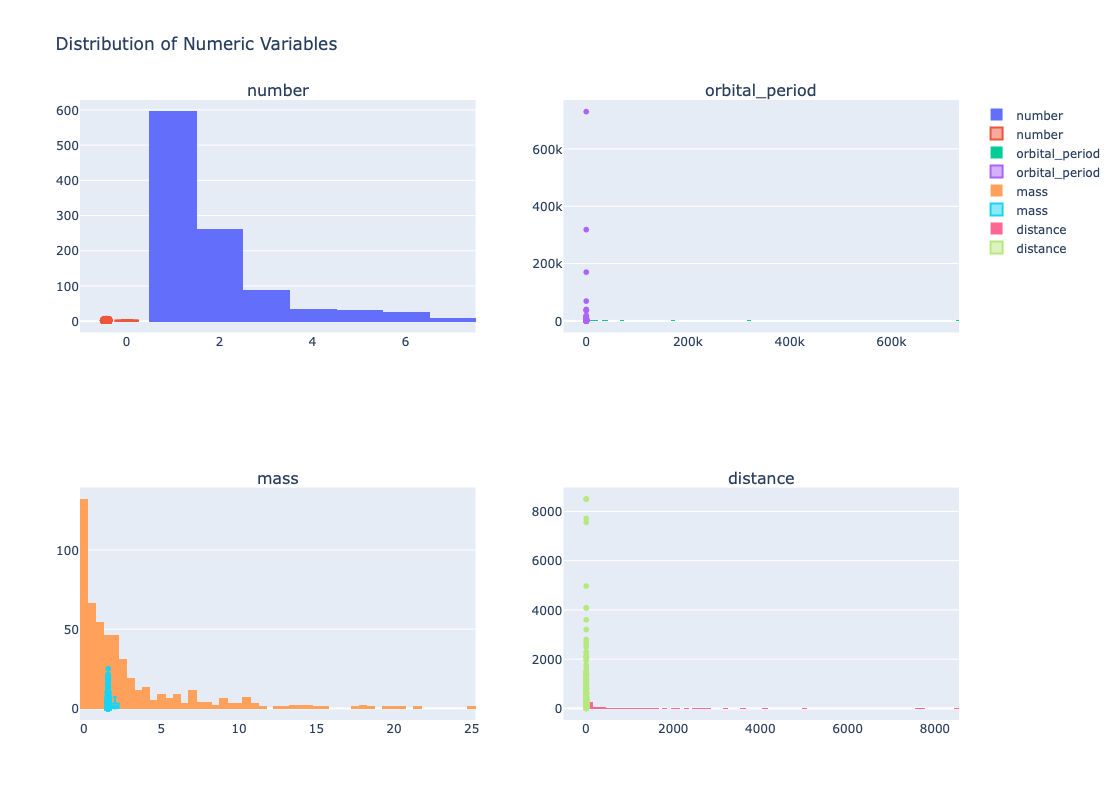

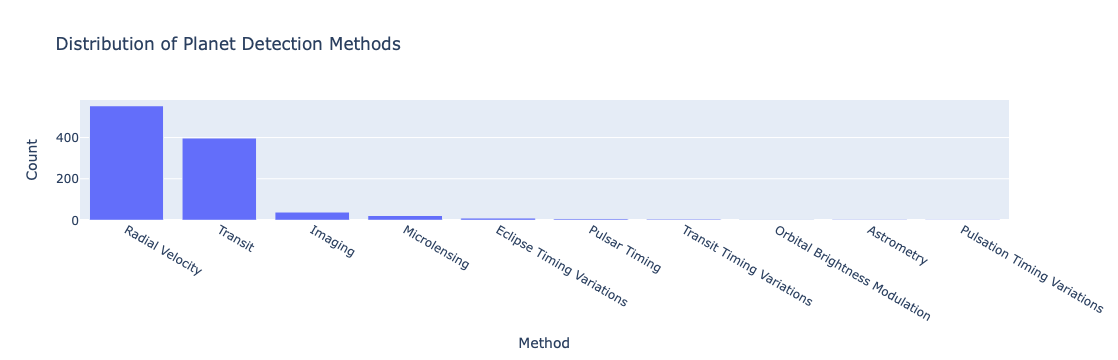

In [48]:
# Create subplots for numeric variables
numeric_cols = ['number', 'orbital_period', 'mass', 'distance']
fig = make_subplots(rows=2, cols=2, subplot_titles=numeric_cols)

for i, col in enumerate(numeric_cols):
    row = i // 2 + 1
    col_num = i % 2 + 1
    fig.add_trace(go.Histogram(x=planets[col], name=col), row=row, col=col_num)
    fig.add_trace(go.Box(y=planets[col], name=col, boxpoints='all', jitter=0.3, pointpos=-1.8), row=row, col=col_num)

fig.update_layout(height=800, width=1000, title_text="Distribution of Numeric Variables")
fig.show()

# Bar chart for categorical variable (method)
method_counts = planets['method'].value_counts()
fig = px.bar(x=method_counts.index, y=method_counts.values, 
             labels={'x': 'Method', 'y': 'Count'},
             title="Distribution of Planet Detection Methods")
fig.show()

From the above plots, we can understand the following:

* The `number` variable is heaily skewed towards lower values indicating most systems have just 1-2 planets.
  

### Bivariate analysis

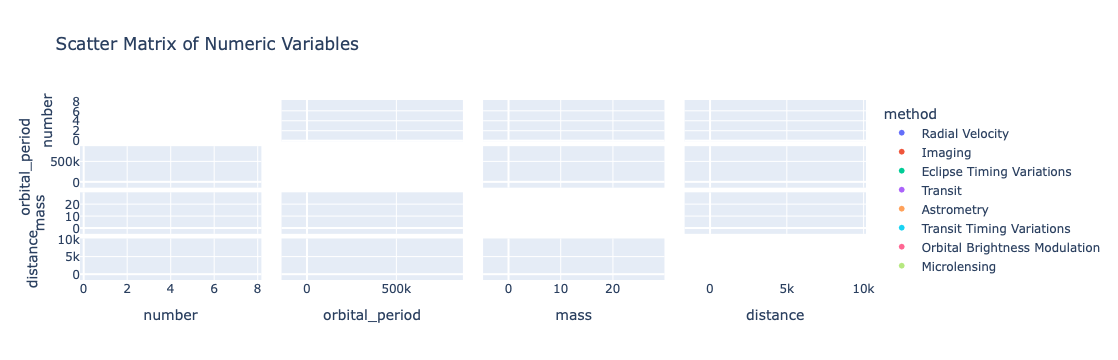

In [67]:
# Scatter plot matrix
fig = px.scatter_matrix(planets, dimensions=['number', 'orbital_period', 'mass', 'distance'],
                        color='method', hover_name='method',
                        title="Scatter Matrix of Numeric Variables")
fig.update_traces(diagonal_visible=False)
fig.show()dddd

### Multivariate analysis

Multivariate analysis involves examining relationships between three or more variables simultaneously.
It allows us to uncover complex relationships and patterns that might not be apparent in bivariate analysis.

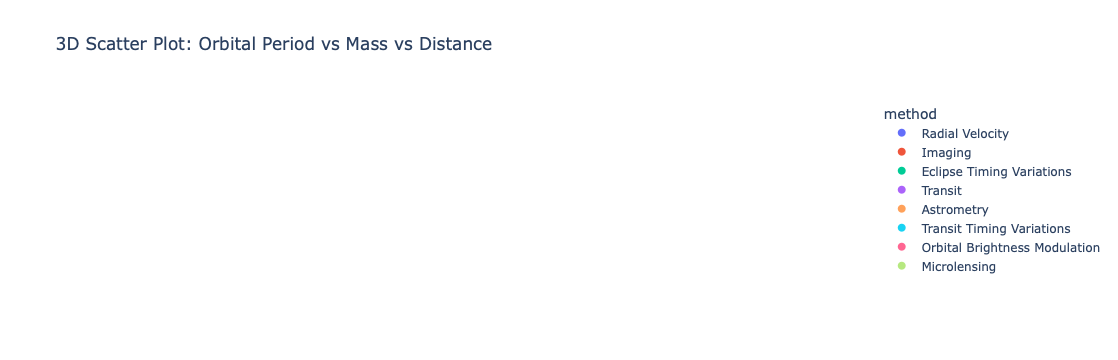

In [69]:
fig = px.scatter_3d(planets, x='orbital_period', y='mass', z='distance', color='method',
                    log_x=True, log_y=True, log_z=True,
                    labels={'orbital_period': 'Log Orbital Period',
                            'mass': 'Log Mass',
                            'distance': 'Log Distance'},
                    title="3D Scatter Plot: Orbital Period vs Mass vs Distance")
fig.show()

### Correlation analysis 

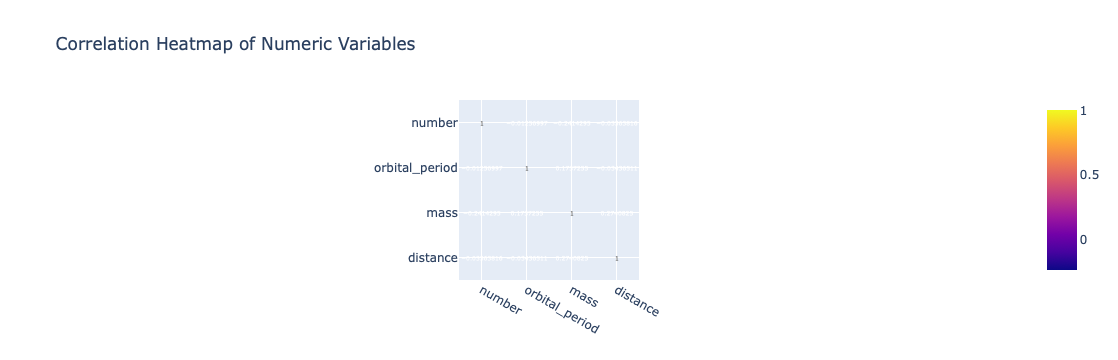

In [79]:
# Calculate correlation matrix
corr_matrix = planets[['number', 'orbital_period', 'mass', 'distance']].corr()

# Create heatmap
fig = px.imshow(corr_matrix, text_auto=True, aspect="equal",
                title="Correlation Heatmap of Numeric Variables")
fig.show()

### Dimensionality Reduction - Principle Component Analysis

Our dataset has a relatively low number of features, so dimensionality reduction techniques are not necessary. 
We can focus on the existing features for our analysis.


### Pattern and Trend Identification

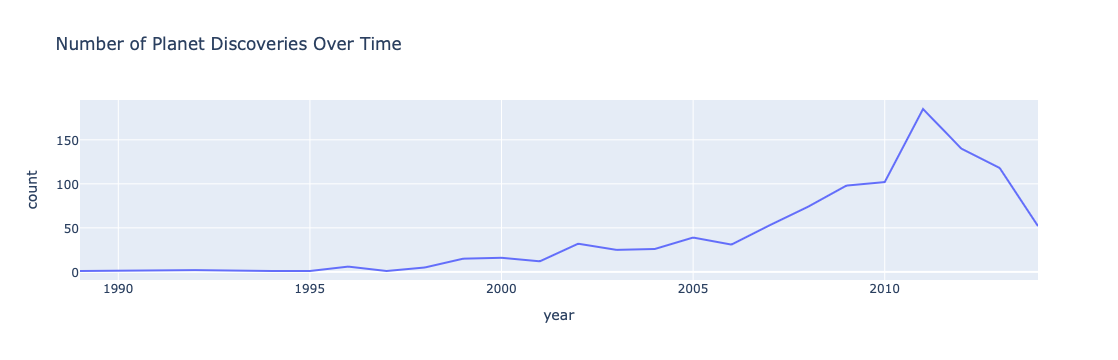

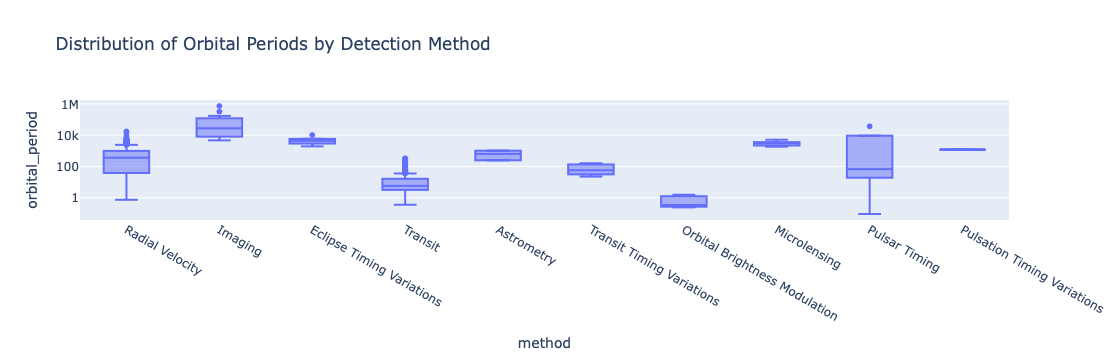

In [90]:
# Convert year to datetime
planets['year'] = pd.to_datetime(planets['year'], format='%Y')

# Group by year and count discoveries
yearly_discoveries = planets.groupby(planets['year'].dt.year).size().reset_index(name='count')

# Line plot for discoveries over time
fig1 = px.line(yearly_discoveries, x='year', y='count', 
               title='Number of Planet Discoveries Over Time')
fig1.show()

# Box plot for orbital period by method
fig2 = px.box(planets, x='method', y='orbital_period', log_y=True,
              title='Distribution of Orbital Periods by Detection Method')
fig2.show()

We can observe the following trends from the above plots:

* There's a clear upward trend in the number of planet discoveries over time, with a sharp increase starting around the year 2006.
* Different detection methods seem to be more effective for planets with certain orbital periods:
  * `Transit` method tends to detect planets with shorter orbital periods. (min: 0.355 and max: 331.06)
  * `Radial Velocity` method has detected planets with a wide range of orbital periods.
  * `Microlensing` has detected some planets with very long orbital periods.
  * `Pulsar Timing` has detected planets with extrme orbital periods.



### Hypothesis Generation

Based on our exploratory data analysis, we can generate several hypotheses:

1. The increase in planet discoveries over time is likely due to advancements in detection technologies and methods.

Evidence:
* The line plot of discoveries over time shows a dramatic uptick starting around 2000.

2. The choice of detection method may be influenced by the expected characteristics of the planet (e.g., orbital period, mass).
3. There might be a physical relationship between a planet's orbital period and its distance from its star.
4. The mass of a planet might have some influence on its orbital period, but the relationship is not strong.
5. The number of planets in a system doesn't seem to be strongly related to the characteristics of individual planets.


____

![busted](https://i.ytimg.com/vi/AFhhWRxZF9Y/maxresdefault.jpg)

## <font color=#00BBFF> Problem #3 Textbook Chapter 4 (10 pts) </font>

Read chapter 4 of your textbook. 

The _10,000 Hour Rule_ is very famous and it promises to guide you to becoming an expert on anything you wish to pursue. Worth knowing!

Summarize in a markdown cell what went wrong in previous descriptions by other authors; why do the authors of your textbook feel this rule has been miscommunicated to the public? How was the data mis-used? How does this issue connect with the topic of the chapter "correlation requires variation"? What does than mean exactly? 


Summary of Issues with the 10,000 Hour Rule
Many previous descriptions of the 10,000 Hour Rule miscommunicated its core premise by oversimplifying the concept of skill acquisition and expertise. The key problem lies in how the data from Anders Ericsson's research was misinterpreted and overgeneralized to suggest that 10,000 hours of practice guarantees expertise in any field. This narrative has permeated popular culture, creating a misleading impression that time alone, without considering the quality and type of practice, leads to mastery.
Variation is Necessary: For a correlation to be meaningful, there must be variation in the data. In the case of the 10,000 Hour Rule, there’s a variation in practice habits, innate abilities, and contextual factors that the rule doesn’t account for when simply stating that "10,000 hours equals expertise."

____

![color](https://miro.medium.com/v2/resize:fit:800/0*-t4uEHHRgeJ8w-wx.png))

## <font color=#00BBFF> Problem #4 Understanding Color (10 pts) </font>

Watch this video. In a markdown cell, summarize the video in 200-300 words. 



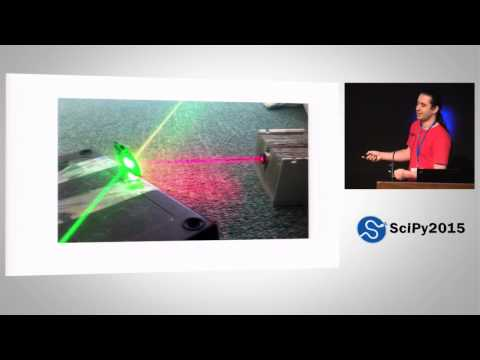

In [4]:
from IPython.display import YouTubeVideo
video_id = "xAoljeRJ3lU"
YouTubeVideo(video_id, width=560, height=315)

Clustering is an unsupervised machine learning technique used to group similar data points together based on their features. The goal of clustering is to organize data into clusters, where data points within the same cluster are more similar to each other than to those in other clusters. 
The Ward algorithm is a method used in hierarchical clustering to group data points based on minimizing the variance within each cluster. It is also known as Ward's minimum variance method. There are many other algorithmns like kmeans, Hierarchial clustering, DBSCAN, Gaussian mixture method, etc
This graph is a representation of how the clustering happens. In the graph below, user has customized the graph to change shapes of the data for better understanding, the number of samples can be taken incresed or decreased. The number of clusters when increased or decreased can be seen and will be split based on the closest neightbours. This graph represents the ward algorithm. The nearest data points will be grouped together. There are different shapes that can be chosen to to analyse hwo the clusters can get formed.  
The graph is a representation of how a dataset can be subdived into subgroups. This graph is a perfect place to play around with different algorithmns to see how the data points get grouped together. 

____

![bokeh](https://bokeh.org/img/apps.gif)

## <font color=#00BBFF> Problem #5 The Bokeh Library (10 pts) </font>

This week we are covering many visualization libraries. In this homework you will learn a bit about Bokeh. Your tasks are:
* comment every line of the code given below,
* read a bit of [this web page](https://docs.bokeh.org/en/latest/docs/reference/bokeh.html), ([this](https://docs.bokeh.org/en/latest/docs/gallery.html) might also be useful)
* in a markdown cell, describe what is unique about Bokeh and when you would, or would not, use it.


In [211]:
from bokeh.plotting import figure, show # import libraries, blokey is a plotting library
from bokeh.io import output_notebook 
from bokeh.models import HoverTool
import random
import numpy as np

output_notebook() 

num_students = 50 # the numeber of students is set
np.random.seed(42)  # set the seed to 42, seed is a number such that when random sample is generated, the sample remains the same of the seed value is provided.
heights = np.random.uniform(150, 190, num_students)  # create a sample set, uniformly distributed from range 150 to 190
weights = np.random.uniform(45, 100, num_students)  # create a sample set, uniformly distributed from range 45 to 100


p = figure(title="Student Heights vs Weights", x_axis_label="Height (cm)", y_axis_label="Weight (kg)",
           width=600, height=400) # plot the graph


scatter = p.circle(heights, weights, size=10, color="navy", alpha=0.5) # plot a scatter plot of the heights and weights. 


hover = HoverTool(tooltips=[("Height", "@x{0.2f} cm"), ("Weight", "@y{0.2f} kg")]) # hover tool is a feature that the pointer changes to a tooltip, the graph can be explored in detail. 


slope, intercept = np.polyfit(heights, weights, 1) # polyfit is a NumPy function used for polynomial curve fitting.
line_x = np.array([min(heights), max(heights)]) # create a numpy array from the minimum of heights to the maximum of arrays. X values
line_y = slope * line_x + intercept # create the Y values. 
p.line(line_x, line_y, color="red", line_width=2, legend_label="Trend Line") # plot the line of Y values against X values. 


p.title.text_font_size = "16pt"
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"
p.legend.click_policy = "hide"


show(p)

Loading BokehJS ...

The most unique feature of Bokeh is its ability to create interactive visualizations directly in the browser. Unlike many other Python visualization libraries, Bokeh is designed to generate plots that not only display data but also allow users to interact with them dynamically, making it ideal for dashboards, data exploration, and web applications.
Interactive Plots: Bokeh provides tools like HoverTool, Zoom, Pan, and Box Select that allow users to explore data interactively.
Web-Ready: Bokeh outputs plots as HTML/JavaScript embedded content, making it easy to integrate with web frameworks like Flask, Django, or as standalone apps.
Linking and Brushing: It supports linking multiple plots together, so interactions in one plot (like selecting data points) can affect other plots.
Customization: Bokeh offers fine-grained control over plot elements, allowing customization to the level of individual axes, glyphs, or tools.
Streaming and Real-Time Data: Bokeh supports streaming data and real-time visualizations, making it a good fit for applications that display live data updates.